<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 6</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 30. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Heißer Draht</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

In dieser Aufgabe wollen wir die eine der einfachsten partiellen Differentialgleichungen, die **Wärmeleitungsgleichung** in einer Dimension, untersuchen. Sie haben diese bereits in der Vorlesung als

\begin{equation}\dfrac{\partial u}{\partial t} = \kappa\frac{\partial^2 u}{\partial x^2}\end{equation}

mit dem Wärmeleitungskoeffizienten $\kappa$ kennengelernt. Für die Bearbeitung dieser Aufgabe setzen wir $\kappa=1$. Physikalisch betrachten wir also zum Beispiel die zeitliche Entwicklung der Temperatur eines Drahtes.

Die einfachste Methode, diese Gleichung zu lösen, ist die **Euler-Methode**, die Sie bereits auf den vorherigen Arbeitsblättern kennengelernt und implementiert haben. Um diese auf die Wärmeleitungsgleichung anzuwenden, müssen Sie allerdings sowohl die Zeit- als auch die Ortsableitung diskretisieren. Den zeitlichen Diskretisierungssschritt nennen wir $dt$ und den räumlichen $dx$. So ergibt sich also

\begin{equation} \dfrac{u(x_j, t_{m + 1}) - u(x_j, t_m)}{\text{dt}} = \dfrac{u(x_{j-1}, t_m) - 2 u(x_j, t_m) + u(x_{j+1}, t_m)}{\text{dx}^2} \end{equation}

wobei $x_j$ die Ortskoordinate des Gitterplatzes $j$ und $t_m$ den Zeitwert des Zeitschritts $m$ bezeichnen. Wenn Sie diese Gleichung nach $u(x_j, t_{m+1})$ auflösen erhalten Sie ein Iterationsrezept um für jeden Zeitschritt eine neue Wärmeverteilung zu berechnen. 

Für eine funktionierende Simulation fehlen noch Randbedingungen. Wir verwenden **Dirichlet-Bedingungen**, das heißt, wir geben die Konfiguration auf dem Rand vor. Diese sei $0$ auf beiden Seiten. Sie müssen außerdem noch eine Startverteilung, d.h. eine Temperaturverteilung bei $t = 0$ angeben. Wir betrachten einen Draht der Länge $l = 1$ und starten mit der Verteilung 

\begin{equation} u(x, 0) = \sin(\pi x),\quad x \in (0, 1).\end{equation}

Ihre Aufgabe ist es, den oben beschriebenen Algorithmus zu implementieren. Untersuchen Sie dann, unter welchen Bedingungen für $dt$ und $dx$ der Algorithmus stabil ist und geben sie für beide Fälle jeweils ein Beispiel an. Um diese Aufgabe zu bearbeiten können Sie zum Beispiel eine große Matrix erstellen, die in einer Dimension die aktuelle Temperaturverteilung und in der anderen die Zeit darstellt. Mit *imshow* können Sie diese dann betrachten. Alternativ können Sie natürlich auch eine Animation erstellen und so den Verlauf live verfolgen.

### define helping functions

In [1]:
function get_x_0(n, f, x_min, x_max)
    # return n start values using function f
    x_0 = []
    for i in linspace(x_min,x_max,n)
        # calculate i-th start value for x
        push!(x_0, f(i))
    end
    return x_0
end

function get_initial_matrix(no_x,no_t, x_0)
    # create matrix with x_0 values set
    output = zeros(no_x, no_t)
    output[:, 1] = x_0 # set start values
    return output
end

get_initial_matrix (generic function with 1 method)

### define DGL solver
$$u(x_j, t_{m+1}) = \left(\frac{u(x_{j-1}, t_m) - 2 u(x_j, t_m) + u(x_{j+1}, t_m)}{\text{dx}^2} + u(x_j, t_m)\right)\cdot \text{dt}$$

In [2]:
function euler_dgl_step(prev_xs, dt, dx)
    # only single step, needed for euler_dgl_solve(...)
    # prev_xs: previous x values
    # dt / dx: size of time / space steps for integration
    xs = prev_xs
    # xs: array with all axes at the current time
    output = zeros(xs)
    for i in 2:length(output)-1
        # use formula:
        # u(xⱼ, tₘ₊₁) = (u(xⱼ, tₘ) + (u(xⱼ₋₁, tₘ) - 2u(xⱼ, tₘ) + u(xⱼ₊₁}, tₘ))/dx^2)*dt
        f_i = xs[i]
        numerator = xs[i-1] - 2*xs[i] + xs[i+1]
        f_i += numerator/dx^2
        output[i] = f_i*dt
    end
    return output
end

function euler_dgl_solve(no_x, no_t, f, x_0=0, x_end=1)
    # no_x / no_t: number of space / time points calculated
    # f: function for initial values, used to calc x_0 values
    # x_0 / x_end: first / last value of x
    dx  = 1/no_x
    dt  = 1/no_t
    matrix = get_initial_matrix(no_x, no_t, get_x_0(no_x, f, x_0, x_end))
    
    for i in 2:no_t
        xs_i = euler_dgl_step(matrix[:, i-1], dt, dx)
        matrix[:, i] = xs_i
    end

    return matrix
end

euler_dgl_solve (generic function with 3 methods)

### calc and plot values

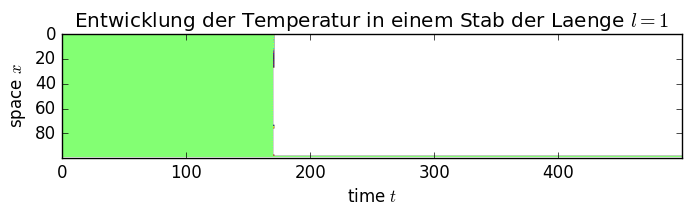

In [3]:
xs = 100
ts = 500
values = euler_dgl_solve(xs, ts, x->sinpi(x))

using PyPlot
title(L"Entwicklung der Temperatur in einem Stab der Laenge $l=1$")
xlabel(L"time $t$")
ylabel(L"space $x$")
imshow(values)
;

## Beobachtung

Ab einem gewissen Zeitpunkt (hier: ca. 170 Zeitschritte) liefert die Funktion keine Werte mehr, sondern "NaN". Dadurch wird ab da kein brauchbarer Plot mehr möglich.

Dennoch sollte eine Veränderung sichtbar sein. Da dies nicht der Fall ist, ist ein Teil der Berechnung fehlerhaft, vermutlich bei den Startwertberechnungen, ggf. auch bei der DGL-Lösung.